In [39]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import gurobipy as gp
ad.__version__, sc.__version__, np.__version__, gp.__version__


('0.10.9', '1.10.4', '1.26.4', '12.0.3')

In [2]:
refAD = sc.read_h5ad('simulated_st/refAD.h5ad')
alignAD = sc.read_h5ad('simulated_st/alignAD.h5ad')

In [3]:
ref_coords = refAD.obs[['array_row','array_col']].values
align_coords = alignAD.obs[['array_row','array_col']].values

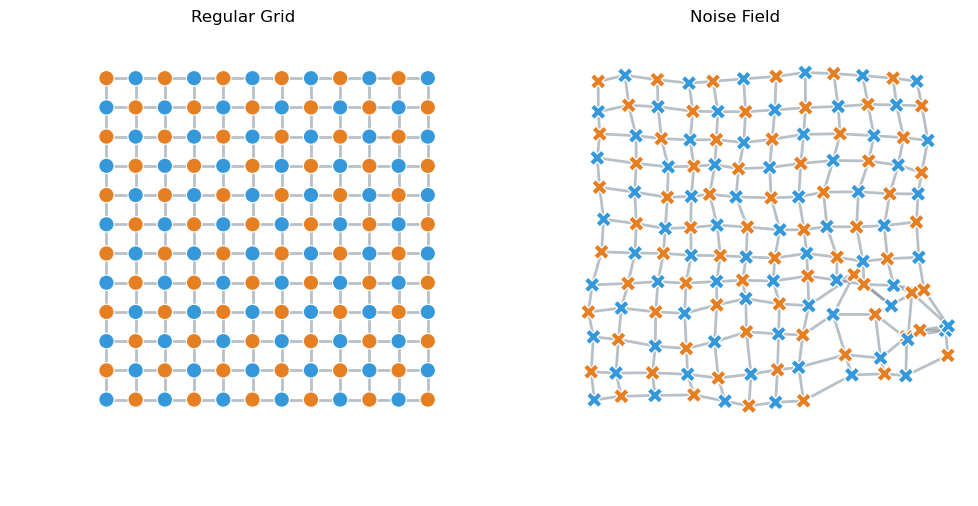

In [4]:
import matplotlib.pyplot as plt
# Create a grid of indices to ensure we connect the same points
grid_size = 12
limits = [0, 10]
grid_indices = np.arange(grid_size * grid_size).reshape(grid_size, grid_size)
ref_classes = refAD.obs['class'].values
align_classes = alignAD.obs['class'].values
# Plot original and transformed grids
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
alpha = 0.5
# Plot original grid
for i in range(grid_size):
    for j in range(grid_size):
        idx = grid_indices[i, j]
        if j < grid_size - 1:  # Draw horizontal line
            idx_next = grid_indices[i, j+1]
            ax1.plot([ref_coords[idx, 0], ref_coords[idx_next, 0]], 
                     [ref_coords[idx, 1], ref_coords[idx_next, 1]], 
                     color='slategrey', alpha=alpha, linewidth=2)
        if i < grid_size - 1:  # Draw vertical line
            idx_below = grid_indices[i+1, j]
            ax1.plot([ref_coords[idx, 0], ref_coords[idx_below, 0]], 
                     [ref_coords[idx, 1], ref_coords[idx_below, 1]], 
                     color='slategrey', alpha=alpha, linewidth=2)

# Plot transformed grid - using same point connections as original
for i in range(grid_size):
    for j in range(grid_size):
        idx = grid_indices[i, j]
        if j < grid_size - 1:  # Draw horizontal line
            idx_next = grid_indices[i, j+1]
            ax2.plot([align_coords[idx, 0], align_coords[idx_next, 0]], 
                     [align_coords[idx, 1], align_coords[idx_next, 1]], 
                     color='slategrey', alpha=alpha, linewidth=2)
        if i < grid_size - 1:  # Draw vertical line
            idx_below = grid_indices[i+1, j]
            ax2.plot([align_coords[idx, 0], align_coords[idx_below, 0]], 
                     [align_coords[idx, 1], align_coords[idx_below, 1]], 
                     color='slategrey', alpha=alpha, linewidth=2)

ax1.set_title('Regular Grid')
ax2.set_title('Noise Field')

# Set consistent limits and aspect ratio
for ax in [ax1, ax2]:
    ax.set_xlim([-1,13.5])
    ax.set_ylim([-1,13.5])
    ax.set_aspect('equal')
for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
import seaborn as sns
sns.scatterplot(x=ref_coords[:, 0], y=ref_coords[:, 1], hue=ref_classes,  palette={0:'#3498db', 1:'#e67e22'},  ax=ax1, s=123, legend=False, zorder=2)
sns.scatterplot(x=align_coords[:, 0], y=align_coords[:, 1], hue=align_classes, palette={0:'#3498db', 1:'#e67e22'}, ax=ax2, marker='X', s=123, legend=False, zorder=2)

plt.tight_layout()


In [5]:
import sys
sys.path.append('..')
from src.inputUtils import createSAMEInput
refDF = createSAMEInput(refAD, zero_center=True)
alignDF = createSAMEInput(alignAD, zero_center=True)

In [6]:
from src.same import run_same

matchedDF = run_same(refDF, alignDF, commonCT = ['0','1'],max_matches=1, radius=4,  delaunay_penalty=1, knn=8,  outprefix='simulated_st')

Loaded Gurobi config from /mnt/e/git-workspace/SAME/src/.gurobienv
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2564318
Set parameter LogFile to value "/mnt/e/git-workspace/SAME/examples/gurobi_logs/gurobi_210672.log"
Academic license 2564318 - for non-commercial use only - registered to ad___@duke.edu
Number of aligned points: 144
Number of reference points: 144
Using all KNN
Number of valid pairs after knn: 1152

Precomputing coordinate maps and valid pairs...

Valid pairs mapping for first aligned point 0:
All possible reference matches: [(0, 0), (1, 12), (2, 1), (3, 13), (4, 24), (5, 2), (6, 25), (7, 14)]

Computing Delaunay triangulation...

Triangle filtering summary:
Total triangles: 269
Triangles skipped (radius): 7
Triangles kept: 262

Triangles containing first aligned point 0:
Number of triangles: 3
Triangle indices: [array([13, 12,  0], dtype=int32), array([1, 0, 2], dtype=int32), array([ 1, 13,  0], dtype=int32)]

Simplex mapping for f

  0%|          | 0/144 [00:00<?, ?it/s]

Adding one match constraints...


  0%|          | 0/144 [00:00<?, ?it/s]

Adding penalty constraints...


  0%|          | 0/144 [00:00<?, ?it/s]

Adding no match constraints...


  0%|          | 0/144 [00:00<?, ?it/s]


Adding spatial constraints...
Adding triangle orientation constraints
Pre-calculating reference areas...
Found 61435 unique reference triangle combinations
Using 32 cores for parallel processing
Parallel processing failed: cannot convert dictionary update sequence element #0 to a sequence
Falling back to sequential processing...


Calculating reference areas:   0%|          | 0/61435 [00:00<?, ?it/s]

Adding constraints...


  0%|          | 0/262 [00:00<?, ?it/s]

Adding 670720 constraints to model...

Setting objective function...

Saving model to simulated_st/matching_model.lp...

Setting optimization parameters...
Set parameter TimeLimit to value 7200
Set parameter MIPGap to value 0.005

Starting optimization...
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: 13th Gen Intel(R) Core(TM) i9-13900KF, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 32 logical processors, using up to 32 threads

Non-default parameters:
TimeLimit  7200
MIPGap  0.005

Academic license 2564318 - for non-commercial use only - registered to ad___@duke.edu
Optimize a model with 671296 rows, 135846 columns and 1574834 nonzeros
Model fingerprint: 0x1f72f125
Variable types: 134694 continuous, 1152 integer (1152 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 1e+02]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective

In [7]:
import pandas as pd
outputDF = pd.read_csv('simulated_st/matches_df.csv')

In [8]:
outputDF

aligned_idx  ref_idx  0  1         X         Y     ref_X  ref_Y  \
0              0        0  1  0 -5.230406 -5.077974 -5.000000   -5.0   
1              1        1  0  1 -4.389100 -4.964899 -4.090909   -5.0   
2              2        2  1  0 -3.342713 -4.940530 -3.181818   -5.0   
3              3        3  0  1 -2.129835 -4.924315 -2.272727   -5.0   
4              4        4  1  0 -1.162059 -5.118187 -1.363636   -5.0   
..           ...      ... .. ..       ...       ...       ...    ...   
139          139      139  1  0  1.335016  5.108249  1.363636    5.0   
140          140      140  0  1  2.220237  5.072985  2.272727    5.0   
141          141      141  1  0  3.122158  5.010058  3.181818    5.0   
142          142      142  0  1  4.067386  4.931256  4.090909    5.0   
143          143      143  1  0  4.806047  4.836434  5.000000    5.0   

     Ref_Cell_Num_Old  Aligned_Cell_Num_Old  time_limit_reached  \
0                   0                     0               False   
1                   1                     1               False   
2                   2                     2               False   
3                   3                     3               False   
4                   4                     4               False   
..                ...                   ...                 ...   
139               139                   139               False   
140               140                   140               False   
141               141                   141               False   
142               142                   142               False   
143               143                   143               False   

     triangle_violation  filtered_violation  run_time  
0                 False               False  9.069302  
1                 False               False  9.069302  
2                 False               False  9.069302  
3                 False               False  9.069302  
4                 False               False  9.069302  
..                  ...                 ...       ...  
139               False               False  9.069302  
140               False               False  9.069302  
141               False               False  9.069302  
142               False               False  9.069302  
143               False               False  9.069302  

[144 rows x 14 columns]

In [9]:
outputDF.filtered_violation.value_counts()/len(outputDF)

filtered_violation
False    0.951389
True     0.048611
Name: count, dtype: float64

In [10]:
commonCT = ['0','1']
cell_type_columns =commonCT.copy()
# Function to find the dominant cell type
def get_dominant_cell_type(row):
    return cell_type_columns[row[cell_type_columns].argmax()]

refDF['Dominant_Cell_Type'] = refDF.apply(get_dominant_cell_type, axis=1)
outputDF['Dominant_Cell_Type'] = outputDF.apply(get_dominant_cell_type, axis=1)
alignDF['Dominant_Cell_Type'] = alignDF.apply(get_dominant_cell_type, axis=1)

In [11]:
commonCT = ['0', '1']
palette = sns.color_palette("Set1", n_colors=len(commonCT))
cTypeDict = {ct: palette[i] for i, ct in enumerate(commonCT)}
colors = [cTypeDict[ct] for ct in outputDF['Dominant_Cell_Type']]

<Axes: xlabel='X', ylabel='Y'>

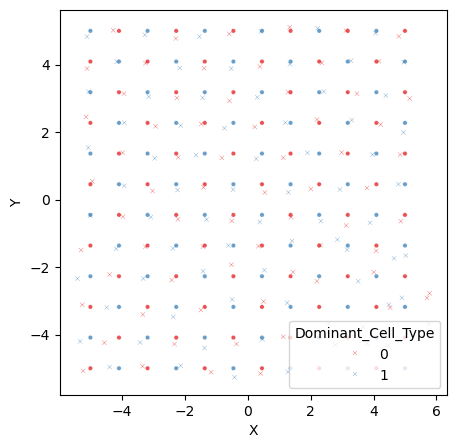

In [12]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(x='X', y='Y', hue='Dominant_Cell_Type', data=refDF,palette=cTypeDict, alpha=0.75, s=10, legend=False)
sns.scatterplot(x='X', y='Y', hue='Dominant_Cell_Type', data=alignDF,palette=cTypeDict, alpha=0.75, s=10, marker='x')



In [13]:
outputDF[outputDF.filtered_violation]

aligned_idx  ref_idx  0  1         X         Y     ref_X     ref_Y  \
21           21       21  1  0  3.677756 -3.775851  3.181818 -4.090909   
22           22       22  0  1  4.490676 -3.115595  4.090909 -4.090909   
34           34       34  1  0  4.527297 -3.201335  4.090909 -3.181818   
35           35       35  0  1  4.903918 -2.911600  5.000000 -3.181818   
44           44       44  0  1  2.850577 -1.187048  2.272727 -2.272727   
56           56       56  1  0  2.310231 -1.352111  2.272727 -1.363636   
57           57       57  0  1  3.159616 -1.485508  3.181818 -1.363636   

    Ref_Cell_Num_Old  Aligned_Cell_Num_Old  time_limit_reached  \
21                21                    21               False   
22                22                    22               False   
34                34                    34               False   
35                35                    35               False   
44                44                    44               False   
56                56                    56               False   
57                57                    57               False   

    triangle_violation  filtered_violation  run_time Dominant_Cell_Type  
21                True                True  9.069302                  0  
22                True                True  9.069302                  1  
34                True                True  9.069302                  0  
35                True                True  9.069302                  1  
44                True                True  9.069302                  1  
56                True                True  9.069302                  0  
57                True                True  9.069302                  1

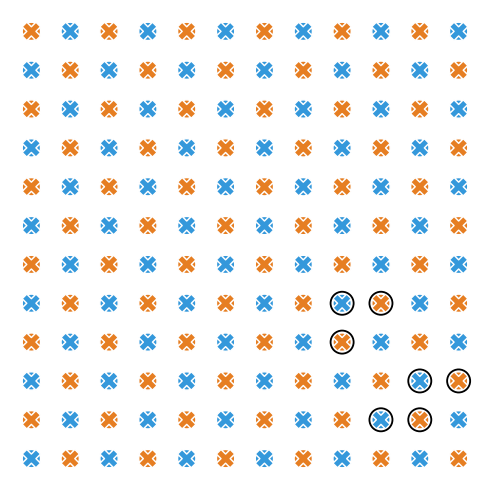

In [14]:
import seaborn as sns
plt.figure(figsize=(5,5))
sZ = 175
cTypeDict = {'0':'#3498db', '1':'#e67e22'}
sns.scatterplot(x='ref_X', y='ref_Y', hue='Dominant_Cell_Type', data=outputDF, palette=cTypeDict, alpha=1, s=sZ,legend=False)

sns.scatterplot(x='X', y='Y', hue='Dominant_Cell_Type', data=refDF, palette=cTypeDict, alpha=1, s=sZ, marker='X', legend=False, )

sns.scatterplot(x='ref_X', y='ref_Y', data=outputDF[outputDF.filtered_violation],
                color='k', alpha=1, s=275, marker='o', facecolors='none', edgecolor='k',)#plt.gca().get_legend().remove()
plt.axis('off')
plt.tight_layout()
#plt.savefig('same_simulated_grid_noise.png', dpi=300)

In [15]:
outputDF['SAME_X'] = outputDF.ref_X
outputDF['SAME_Y'] = outputDF.ref_Y
refDF['SAME_X'] = refDF.X
refDF['SAME_Y'] = refDF.Y

In [16]:
refDF

X    Y  Cell Type  0  1 Cell_Num_Old Dominant_Cell_Type    SAME_X  \
0   -5.000000 -5.0          0  1  0            0                  0 -5.000000   
1   -4.090909 -5.0          1  0  1            1                  1 -4.090909   
2   -3.181818 -5.0          0  1  0            2                  0 -3.181818   
3   -2.272727 -5.0          1  0  1            3                  1 -2.272727   
4   -1.363636 -5.0          0  1  0            4                  0 -1.363636   
..        ...  ...        ... .. ..          ...                ...       ...   
139  1.363636  5.0          0  1  0          139                  0  1.363636   
140  2.272727  5.0          1  0  1          140                  1  2.272727   
141  3.181818  5.0          0  1  0          141                  0  3.181818   
142  4.090909  5.0          1  0  1          142                  1  4.090909   
143  5.000000  5.0          0  1  0          143                  0  5.000000   

     SAME_Y  
0      -5.0  
1      -5.0  
2      -5.0  
3      -5.0  
4      -5.0  
..      ...  
139     5.0  
140     5.0  
141     5.0  
142     5.0  
143     5.0  

[144 rows x 9 columns]

In [17]:
def check_alignment(inDF1, inDF2, xcol, ycol):
    # List of cell type columns to check    
    # Create KDTree for efficient nearest neighbor search
    from scipy.spatial import KDTree
    tree = KDTree(inDF2[[xcol, ycol]].values)
    ct = 'Dominant_Cell_Type'
    # Find nearest neighbors and check if dominant cell types match
    distances, indices = tree.query(inDF1[[xcol, ycol]].values, k=1)
    #print(indices[1:10])
    inDF1['nearest_dominant_type'] = inDF2.iloc[indices][ct].values
    inDF1['type_match'] = inDF1[ct] == inDF1['nearest_dominant_type']

    # Calculate alignment score
    alignment_score = inDF1['type_match'].mean()
    
    print(f"Alignment score: {alignment_score:.2%}")
    
    return alignment_score, inDF1[[xcol, ycol, ct, 'nearest_dominant_type', 'type_match']]
print("Alignment score after SAME:")
ascore, outplot = check_alignment(outputDF, refDF, 'SAME_X', 'SAME_Y')
print("Alignment score before SAME:")
ascore_before, outplot_before = check_alignment(alignDF, refDF, 'X', 'Y')


Alignment score after SAME:
Alignment score: 100.00%
Alignment score before SAME:
Alignment score: 93.06%


In [18]:
outputDF.filtered_violation.value_counts()/len(outputDF)

filtered_violation
False    0.951389
True     0.048611
Name: count, dtype: float64

In [20]:
import ctypes
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
# Create color mapping dictionary for cell types using Set1 colormap
import seaborn as sns




def animate_transition(outputDF, fig, ax, total_frames=100, interval=100, outName='animation.gif'):
    # Initial scatter plot
    ctypeDict = {'0':'#3498db', '1':'#e67e22'}
    colors = [cTypeDict[ct] for ct in outputDF['Dominant_Cell_Type']]
    scatter = ax.scatter(outputDF['X'], outputDF['Y'], c=colors, s=12, marker='X')
    ax.axis('off')
    # Add triangulation plot
    #ax.triplot(outputDF['X'], outputDF['Y'], mapped_triangles_iloc, color='gray')

    def update(frame):
        # Interpolate between the two sets of points
        progress = frame / total_frames
        current_x = (1 - progress) * outputDF['X'] + progress * outputDF['ref_X']
        current_y = (1 - progress) * outputDF['Y'] + progress * outputDF['ref_Y']
        scatter.set_offsets(np.c_[current_x, current_y])
        #ax.triplot(current_x, current_y, mapped_triangles_iloc, color='gray')
        return scatter,

    # Create the animation
    anim = animation.FuncAnimation(fig, update, frames=total_frames, interval=interval, blit=True, repeat=False)

    # Save the animation
    anim.save(outName, writer='pillow', fps=15)

    # Display the animation
    plt.close(fig)  # Close the figure to prevent it from displaying twice
    return HTML(anim.to_jshtml())

# Assuming outputDF is already defined and contains the necessary columns ['X', 'Y', 'ref_X', 'ref_Y']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(outputDF[['X', 'ref_X']].min().min() - 1, outputDF[['X', 'ref_X']].max().max() + 1)
ax.set_ylim(outputDF[['Y', 'ref_Y']].min().min() - 1, outputDF[['Y', 'ref_Y']].max().max() + 1)
#ax.invert_yaxis()

# Call the animate_transition function
animation_html = animate_transition(outputDF, fig, ax, total_frames=100, interval=100, outName='animation.gif')
animation_html